<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import numpy as np
import circuit
from importlib import reload
import functionalities
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

**Fixed parameters for the experiment**

In [3]:
N_bags=50
N_items=15
nb_periods=20
spec_param={'C':[1.,1.],'phi':[np.pi/8,np.pi/2],'em':[1,1],'omega':[5,5]}

**What we will vary during the experiment**

In [26]:
subsample = [25,24,23,21,18,15,12,9,6]

**To store the results**

In [5]:
df_RBF_m = pd.DataFrame(index=['mean_RBF_rmse'], columns=subsample)
df_RBF_std = pd.DataFrame(index=['std_RBF_rmse'], columns=subsample)
df_RBF_Sig_m = pd.DataFrame(index=['mean_Sig_rmse'], columns=subsample)
df_RBF_Sig_std = pd.DataFrame(index=['std_Sig_rmse'], columns=subsample)
df_Pathwise_Sig_m = pd.DataFrame(index=['mean_pathwise_Sig_rmse'], columns=subsample)
df_Pathwise_Sig_std = pd.DataFrame(index=['std_pathwise_Sig_rmse'], columns=subsample)

**Run the experiment**

In [15]:
reload(circuit)
reload(functionalities)

cv=5

for j,param in enumerate(subsample):
    
    print(j)
        
    ''' GENERATE DATA '''
    t_span = np.linspace(0, nb_periods * 2 * np.pi / spec_param['omega'][0], nb_periods * 25)
    # this is what changes
    nb_obs = nb_periods * param
    # generate data
    example = circuit.Circuit(N_bags=N_bags, N_items=N_items, spec_param=spec_param, t_span=t_span, nb_obs=nb_obs)
    example.generate_data()
    example.get_phi()
    
    X = example.paths
    y = example.labels[:,0]
    
    mean,std  = functionalities.SigESig_LinReg(depth1=4, depth2=2, X=X, y=y, ll=None, at=False, ss=False,cv=cv)
    df_Pathwise_Sig_m.iloc[0,j] = mean
    df_Pathwise_Sig_std.iloc[0,j] = std   
    
    mean,std  = functionalities.ESig_SVM(depth=5, X=X, y=y, ll=None, at=False, ss=True, cv=cv)

    df_RBF_Sig_m.iloc[0,j] = mean
    df_RBF_Sig_std.iloc[0,j] = std
    
#     mean,std = functionalities.RBF_RBF_SVM(X=X, y=y,cv=cv)
#     df_RBF_m.iloc[0,j] = mean
#     df_RBF_std.iloc[0,j] = std

0


100%|██████████| 50/50 [00:06<00:00,  7.58it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.7s finished
100%|██████████| 50/50 [00:00<00:00, 55.15it/s] 


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    3.8s finished


1


100%|██████████| 50/50 [00:03<00:00, 11.59it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.2s finished
100%|██████████| 50/50 [00:00<00:00, 53.50it/s]


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.7s finished


2


100%|██████████| 50/50 [00:02<00:00, 23.95it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.7s finished
100%|██████████| 50/50 [00:00<00:00, 51.16it/s]


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.0s finished


3


100%|██████████| 50/50 [00:04<00:00, 12.25it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.6s finished
100%|██████████| 50/50 [00:00<00:00, 130.60it/s]


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    6.4s finished


4


100%|██████████| 50/50 [00:01<00:00, 41.60it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.3s finished
100%|██████████| 50/50 [00:00<00:00, 208.70it/s]


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    3.6s finished


5


100%|██████████| 50/50 [00:01<00:00, 46.39it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.2s finished
100%|██████████| 50/50 [00:00<00:00, 213.68it/s]


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 115 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.4s finished
  0%|          | 0/50 [00:00<?, ?it/s]

6


100%|██████████| 50/50 [00:00<00:00, 137.90it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.6s finished
100%|██████████| 50/50 [00:00<00:00, 732.55it/s]


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    5.4s finished


7


100%|██████████| 50/50 [00:00<00:00, 82.67it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  49 out of 160 | elapsed:    1.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.9s finished
100%|██████████| 50/50 [00:00<00:00, 799.38it/s]


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    3.4s finished


8


100%|██████████| 50/50 [00:00<00:00, 85.45it/s]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.5s finished
100%|██████████| 50/50 [00:00<00:00, 1174.12it/s]


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.8s finished


In [19]:
m = pd.concat([df_RBF_m,df_Pathwise_Sig_m,df_RBF_Sig_m],join="inner")
stdv = pd.concat([df_RBF_std,df_Pathwise_Sig_std,df_RBF_Sig_std],join="inner")
import pickle
pickle.dump([m,stdv],open('results_circuits.obj','wb'))

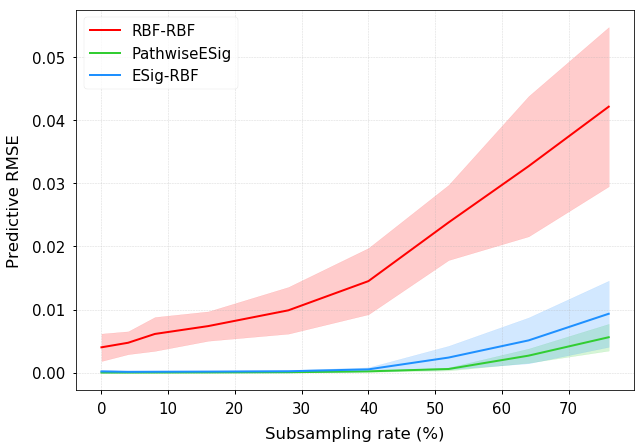

In [30]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
fig,ax = plt.subplots(1,figsize=(10,7))

labels = ['RBF-RBF', 'PathwiseESig','ESig-RBF']
colors = ['red','limegreen','dodgerblue']

for i in [0,1,2]:

    ax.plot([100-100*e/25 for e in subsample],m.iloc[i].ewm(alpha=0.1).mean().values.astype(float),color=colors[i],
            label=labels[i],marker='o',fillstyle='none',lw=2.)
    fact=1
    
    params = np.array([100-100*e/25 for e in subsample])
    plus = m.iloc[i].ewm(alpha=0.1).mean().values.astype(float)  + fact*stdv.iloc[i].ewm(alpha=0.1).mean().values.astype(float)
    minus = m.iloc[i].ewm(alpha=0.1).mean().values.astype(float) - fact*stdv.iloc[i].ewm(alpha=0.1).mean().values.astype(float).astype(float)

    ax.fill_between(params, minus,plus,alpha=0.2,color=colors[i])


ax.legend(loc='upper left')
ax.set_ylabel(r'Predictive RMSE',labelpad=10)
#ax.yaxis.set_ticks(np.arange(0.05, 0.50, 0.05))
ax.set_xlabel(r'Subsampling rate (%)',labelpad=10)
ax.grid(alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.savefig('pictures/circuit.png')
plt.show()